<a href="https://colab.research.google.com/github/ParvanehFarajiDizaji/Plant_Classification/blob/main/PlantFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

dataset_path = "/content/drive/My Drive/Plant Disease Recognition"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

dataset_path = "/content/drive/My Drive/Plant Disease Recognition"


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load training and validation datasets
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Split into training and validation (80-20)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_data, val_data = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

# Get class names
class_names = train_dataset.classes
print(f"Classes: {class_names}")


Classes: ['Test', 'Train', 'Validation']


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the dataset directory paths
dataset_path = "/content/drive/My Drive/Plant Disease Recognition"

train_dir = os.path.join(dataset_path, "Train")
val_dir = os.path.join(dataset_path, "Validation")
test_dir = os.path.join(dataset_path, "Test")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets separately for training, validation, and testing
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Get class names
class_names = train_dataset.classes  # This should now correctly show ['powdery', 'rust', 'healthy']
print(f"Classes: {class_names}")


Classes: ['Train']


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Base dataset directory
dataset_path = "/content/drive/My Drive/Plant Disease Recognition"

# Adjust paths to point to the inner class folders
train_dir = os.path.join(dataset_path, "Train", "Train")  # Inside Train folder
val_dir = os.path.join(dataset_path, "Validation", "Validation")  # Inside Validation folder
test_dir = os.path.join(dataset_path, "Test", "Test")  # Inside Test folder

# Verify the paths
print("Train directory contains:", os.listdir(train_dir))
print("Validation directory contains:", os.listdir(val_dir))
print("Test directory contains:", os.listdir(test_dir))

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load datasets separately
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Get class names
class_names = train_dataset.classes  # This should now correctly show ['powdery', 'rust', 'healthy']
print(f"Classes: {class_names}")


Train directory contains: ['Rust', 'Powdery', 'Healthy']
Validation directory contains: ['Healthy', 'Powdery', 'Rust']
Test directory contains: ['Rust', 'Healthy', 'Powdery']
Classes: ['Healthy', 'Powdery', 'Rust']


Classes: ['Healthy', 'Powdery', 'Rust']


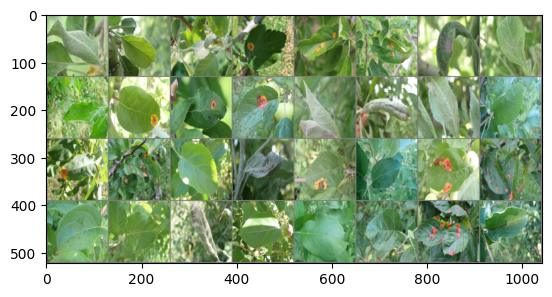

Powdery Healthy Powdery Rust


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import os
import matplotlib.pyplot as plt
import numpy as np

# Set dataset path
dataset_path = "/content/drive/My Drive/Plant Disease Recognition"
train_dir = os.path.join(dataset_path, "Train", "Train")  # Fix nested path
val_dir = os.path.join(dataset_path, "Validation", "Validation")
test_dir = os.path.join(dataset_path, "Test", "Test")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [0,1]
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Split train dataset (70% train, 15% val, 15% test)
total_size = len(train_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # Ensure total sum is correct

train_data, val_data, test_data = random_split(train_dataset, [train_size, val_size, test_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Get class names
class_names = train_dataset.classes
print(f"Classes: {class_names}")

# Function to visualize images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Visualize a batch
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(class_names[labels[j]] for j in range(4)))


Classes: ['Healthy', 'Powdery', 'Rust']
Epoch [1/10], Train Loss: 0.9105, Train Accuracy: 0.5989, Validation Loss: 0.4905, Validation Accuracy: 0.7929
Epoch [2/10], Train Loss: 0.4842, Train Accuracy: 0.8108, Validation Loss: 0.4688, Validation Accuracy: 0.7929
Epoch [3/10], Train Loss: 0.3442, Train Accuracy: 0.8681, Validation Loss: 0.3742, Validation Accuracy: 0.8838
Epoch [4/10], Train Loss: 0.2052, Train Accuracy: 0.9395, Validation Loss: 0.3904, Validation Accuracy: 0.9192
Epoch [5/10], Train Loss: 0.1648, Train Accuracy: 0.9557, Validation Loss: 0.3022, Validation Accuracy: 0.9495
Epoch [6/10], Train Loss: 0.1206, Train Accuracy: 0.9600, Validation Loss: 0.4738, Validation Accuracy: 0.9141
Epoch [7/10], Train Loss: 0.0741, Train Accuracy: 0.9827, Validation Loss: 0.3362, Validation Accuracy: 0.9343
Epoch [8/10], Train Loss: 0.0410, Train Accuracy: 0.9849, Validation Loss: 0.5042, Validation Accuracy: 0.9394
Epoch [9/10], Train Loss: 0.0195, Train Accuracy: 0.9957, Validation Los

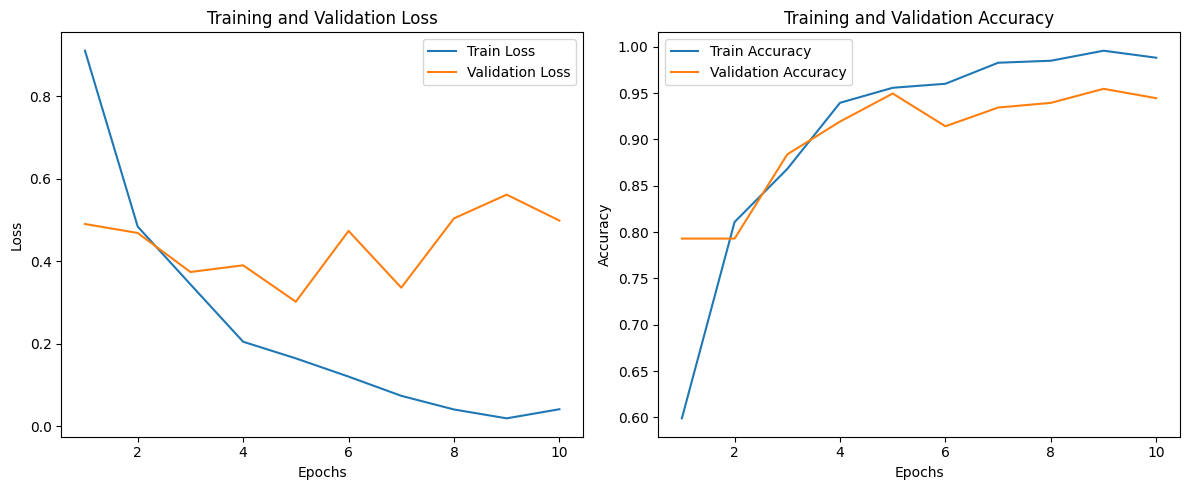

In [ ]:
#Simple CNN
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import os
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = "/content/drive/My Drive/Plant Disease Recognition"
train_dir = os.path.join(dataset_path, "Train", "Train")  # Fix nested path
val_dir = os.path.join(dataset_path, "Validation", "Validation")
test_dir = os.path.join(dataset_path, "Test", "Test")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [0,1]
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Split train dataset (70% train, 15% val, 15% test)
total_size = len(train_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # Ensure total sum is correct

train_data, val_data, test_data = random_split(train_dataset, [train_size, val_size, test_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Get class names
class_names = train_dataset.classes
print(f"Classes: {class_names}")

# Define CNN model (Simple CNN)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, len(class_names))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define CNN model (Deeper CNN with more layers and dropout)
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, len(class_names))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 256 * 16 * 16)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Select model: SimpleCNN or DeepCNN
model = SimpleCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model and plot the curves
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Plot accuracy and loss curves
def plot_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, num_epochs + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

plot_curves(train_losses, val_losses, train_accuracies, val_accuracies)

Classes: ['Healthy', 'Powdery', 'Rust']
Epoch [1/10], Train Loss: 1.1836, Train Accuracy: 0.5286, Validation Loss: 0.5860, Validation Accuracy: 0.7778
Epoch [2/10], Train Loss: 0.6337, Train Accuracy: 0.7330, Validation Loss: 0.6524, Validation Accuracy: 0.7172
Epoch [3/10], Train Loss: 0.4619, Train Accuracy: 0.8022, Validation Loss: 0.4422, Validation Accuracy: 0.8232
Epoch [4/10], Train Loss: 0.3683, Train Accuracy: 0.8562, Validation Loss: 0.4167, Validation Accuracy: 0.8434
Epoch [5/10], Train Loss: 0.2543, Train Accuracy: 0.9070, Validation Loss: 0.3430, Validation Accuracy: 0.8889
Epoch [6/10], Train Loss: 0.1927, Train Accuracy: 0.9297, Validation Loss: 0.2308, Validation Accuracy: 0.9192
Epoch [7/10], Train Loss: 0.1468, Train Accuracy: 0.9459, Validation Loss: 0.3377, Validation Accuracy: 0.8990
Epoch [8/10], Train Loss: 0.1056, Train Accuracy: 0.9654, Validation Loss: 0.2216, Validation Accuracy: 0.9242
Epoch [9/10], Train Loss: 0.0543, Train Accuracy: 0.9881, Validation Los

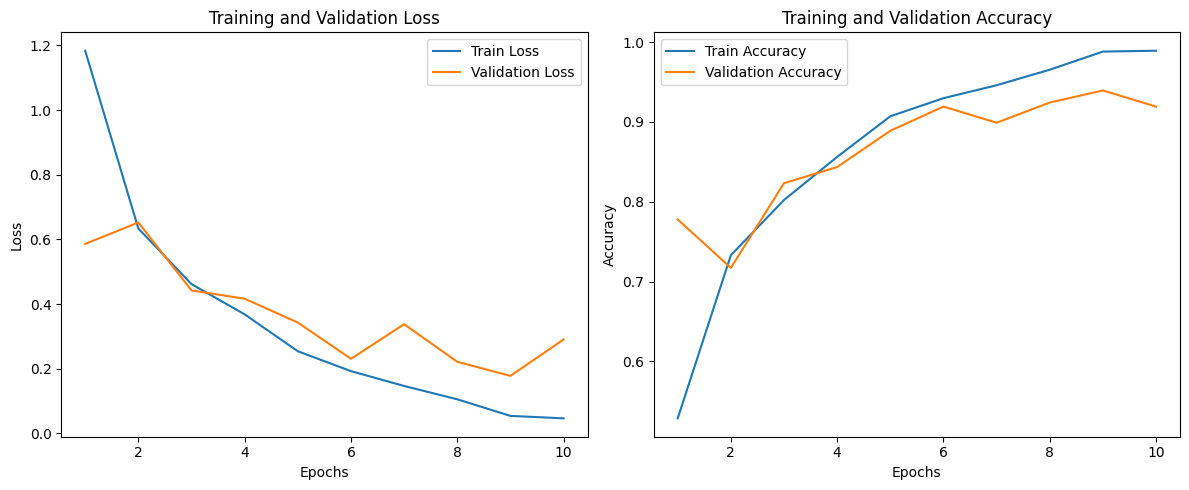

In [ ]:
#CNN with more conv
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import os
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = "/content/drive/My Drive/Plant Disease Recognition"
train_dir = os.path.join(dataset_path, "Train", "Train")  # Fix nested path
val_dir = os.path.join(dataset_path, "Validation", "Validation")
test_dir = os.path.join(dataset_path, "Test", "Test")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [0,1]
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Split train dataset (70% train, 15% val, 15% test)
total_size = len(train_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size  # Ensure total sum is correct

train_data, val_data, test_data = random_split(train_dataset, [train_size, val_size, test_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Get class names
class_names = train_dataset.classes
print(f"Classes: {class_names}")

# Define CNN model (Simple CNN)
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, len(class_names))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define CNN model (Deeper CNN with more layers and dropout)
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, len(class_names))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 256 * 16 * 16)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Select model: SimpleCNN or DeepCNN
model = DeepCNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model and plot the curves
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Plot accuracy and loss curves
def plot_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, num_epochs + 1)

    # Plot training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

plot_curves(train_losses, val_losses, train_accuracies, val_accuracies)

Classes: ['Healthy', 'Powdery', 'Rust']
Epoch [1/10], Train Loss: 1.2808, Train Accuracy: 0.5730, Validation Loss: 0.9181, Validation Accuracy: 0.6364
Epoch [2/10], Train Loss: 0.7532, Train Accuracy: 0.7211, Validation Loss: 0.5742, Validation Accuracy: 0.7828
Epoch [3/10], Train Loss: 0.5524, Train Accuracy: 0.8086, Validation Loss: 0.5372, Validation Accuracy: 0.8131
Epoch [4/10], Train Loss: 0.4150, Train Accuracy: 0.8497, Validation Loss: 0.6534, Validation Accuracy: 0.7727
Epoch [5/10], Train Loss: 0.4367, Train Accuracy: 0.8714, Validation Loss: 0.7401, Validation Accuracy: 0.7121
Epoch [6/10], Train Loss: 0.4163, Train Accuracy: 0.8497, Validation Loss: 0.7021, Validation Accuracy: 0.7677
Epoch [7/10], Train Loss: 0.4029, Train Accuracy: 0.8768, Validation Loss: 0.7088, Validation Accuracy: 0.7677
Epoch [8/10], Train Loss: 0.2667, Train Accuracy: 0.9135, Validation Loss: 0.9149, Validation Accuracy: 0.7576
Epoch [9/10], Train Loss: 0.3216, Train Accuracy: 0.8865, Validation Los

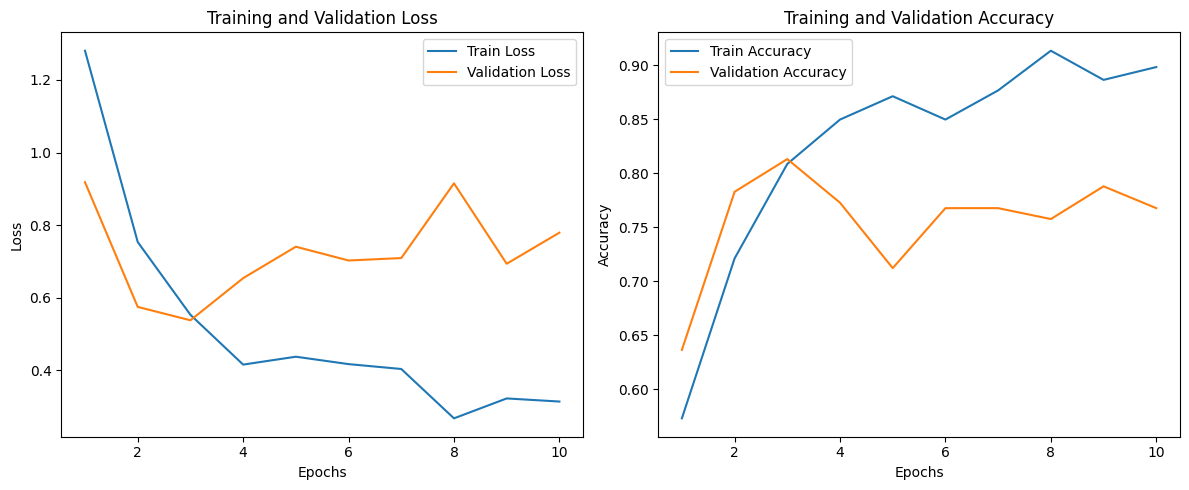

In [ ]:
#MLP
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
import os
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = "/content/drive/My Drive/Plant Disease Recognition"
train_dir = os.path.join(dataset_path, "Train", "Train")
val_dir = os.path.join(dataset_path, "Validation", "Validation")
test_dir = os.path.join(dataset_path, "Test", "Test")

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

# Split train dataset
total_size = len(train_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_data, val_data, test_data = random_split(train_dataset, [train_size, val_size, test_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Get class names
class_names = train_dataset.classes
print(f"Classes: {class_names}")

# Define MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 128 * 128, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.output = nn.Linear(256, len(class_names))
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.output(x)
        return x

# Initialize MLP model
model = MLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
              f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return train_losses, val_losses, train_accuracies, val_accuracies

# Train the model and plot the curves
num_epochs = 10
train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Plot accuracy and loss curves
def plot_curves(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.tight_layout()
    plt.show()

plot_curves(train_losses, val_losses, train_accuracies, val_accuracies)



## **Layer-by-Layer Explanation**  
The SimpleCNN architecture used in the project consists of the following layers:

### **1. Convolutional Layer 1**  
- **Input:** 128 × 128 × 3 (RGB image)  
- **Conv2D(3, 32, kernel_size=3, padding=1)**:  
  - Uses 32 filters of size 3×3 with **stride 1** and **padding 1** to maintain spatial dimensions.  
  - This extracts **low-level features** such as edges and textures.  
- **Activation:** ReLU  
  - Introduces non-linearity, enabling the model to learn complex patterns.  
- **Max Pooling (2×2)**  
  - Reduces spatial dimensions from **128×128** to **64×64**, making computation more efficient.  

### **2. Convolutional Layer 2**  
- **Conv2D(32, 64, kernel_size=3, padding=1)**  
  - Increases filters to 64, allowing the model to capture more complex patterns like shapes and textures.  
- **Activation:** ReLU  
- **Max Pooling (2×2)**  
  - Reduces spatial dimensions from **64×64** to **32×32**.  

### **3. Fully Connected Layers**  
- **Flattening**  
  - Converts the 32 × 32 × 64 feature map into a 1D vector of size **64 × 32 × 32 = 65536 neurons**.  
- **FC1: Fully Connected Layer (128 neurons)**  
  - Applies a dense layer with 128 neurons to learn **high-level feature representations**.  
- **Dropout (0.5)**  
  - Drops 50% of neurons randomly during training to **reduce overfitting**.  
- **FC2: Fully Connected Layer (Output Layer)**  
  - Outputs a **softmax-activated** vector with length equal to the number of classes (3 in this case: Healthy, Powdery, Rust).  

## **Choice of Activation Functions**  
- **ReLU (Rectified Linear Unit)**: Used in convolutional layers to introduce non-linearity, helping the network learn complex patterns.  
- **Softmax (Output layer)**: Converts the final output into a probability distribution over the three classes.  

## **Regularization Techniques**  
- **Dropout (0.5)**: Reduces overfitting by preventing co-adaptation of neurons.  
- **Batch Normalization (not used here but could be added)**: Helps stabilize learning and improves convergence speed.  

## **Key Observations**  
- The **CNN outperforms the MLP in accuracy and generalization** (higher validation accuracy, lower validation loss).  
- The **train accuracy (99%) is much higher than validation accuracy (91%)**, suggesting a **slight overfitting** in CNN. Dropout helped, but further regularization might be needed.  
- The **CNN model is much better at feature extraction**, leading to improved classification performance compared to MLP.  

# **3. Reflection on Feature Extraction: CNN vs. MLP**  

### **MLP (Multilayer Perceptron)**  
- **Fully connected layers** treat images as **1D vectors**, losing spatial information.  
- Struggles with high-dimensional data like images.  
- Performs well on simple structured datasets but struggles with complex patterns.  

### **CNN (Convolutional Neural Networks)**  
- **Feature extraction is automatic**:  
  - **Early layers** detect edges and textures.  
  - **Middle layers** recognize shapes and structures.  
  - **Deeper layers** identify object-level features (leaf disease patterns).  
- CNNs use **local receptive fields**, meaning they focus on small parts of an image at a time, which makes them **scale and position invariant**.  

- CNNs outperform MLP significantly on both training and validation accuracy.

SimpleCNN generalizes better with higher validation accuracy than the DeepCNN.

- MLP performance drops after early epochs, likely due to its limited ability to extract spatial patterns.

## **Conclusion:**
- CNNs are naturally suited for image classification due to:

- Automated feature extraction

- Preservation of spatial information

- Higher efficiency with fewer parameters than large MLPs